In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import keras

import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [301]:
df = pd.read_csv('files/titanic.csv')

In [302]:
df.columns = df.columns.str.lower()

In [303]:
df.columns = df.columns.str.lower()

# Remplacer les valeurs nulles de la colonne "age" par la moyenne de la colonne
df["age"] = df["age"].fillna(df["age"].mean())

# Supprimer les lignes qui contiennent des valeurs nulles dans la colonne "embarked"
df = df.dropna(subset=["embarked"])

# Supprimer la colonne "cabin" car elle contient beaucoup de valeurs nulles
df = df.drop("cabin", axis=1)

# Supprimer la colonne "name" et "passengerid" car elles ne servent à rien pour du ML
df = df.drop(["name","passengerid"], axis=1)

# Supprimer la colonne "cabin" car elle contient beaucoup de valeurs nulles
df = df.drop("ticket", axis=1)

In [304]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [305]:
X = df.iloc[:, 1:].values
y = df.iloc[:, :1].values

#### Label Encoding Gender

In [306]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

#### HotEncoder Embarked

In [307]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [308]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [309]:
# Séparer les données en données d'entraînement, de validation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [310]:
from keras.layers import Dense, Input
from keras.models import Sequential 

model_cl = Sequential()
model_cl.add(Dense(units=64, activation='relu'))
model_cl.add(Dense(units=64, activation='relu'))
model_cl.add(Dense(units=64, activation='relu'))
model_cl.add(Dense(units=1, activation="sigmoid"))

model_cl.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])
histcl = model_cl.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3967 - loss: 0.7077 - val_accuracy: 0.5449 - val_loss: 0.6956
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5824 - loss: 0.6909 - val_accuracy: 0.6629 - val_loss: 0.6846
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - loss: 0.6789 - val_accuracy: 0.6685 - val_loss: 0.6750
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6560 - loss: 0.6681 - val_accuracy: 0.6798 - val_loss: 0.6655
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6595 - loss: 0.6620 - val_accuracy: 0.6573 - val_loss: 0.6562
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6694 - loss: 0.6503 - val_accuracy: 0.6798 - val_loss: 0.6474
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6729 - loss: 0.6393 - val_accuracy: 0.6910 - val_loss: 0.6389
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.6272 - val_accuracy: 0.7022 - val_loss: 0.6305
Ep

In [311]:
y_prednn = model_cl.predict(X_test)
y_prednn = (y_prednn > 0.5)
# print(np.concatenate((y_prednn.reshape(len(y_prednn),1), y_test.reshape(len(y_test),1)),1))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [312]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prednn)
print(cm)

[[94 15]
 [17 52]]


In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        99
           1       0.78      0.68      0.73        79

    accuracy                           0.78       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.78      0.77       178



c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [314]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84 25]
 [15 54]]


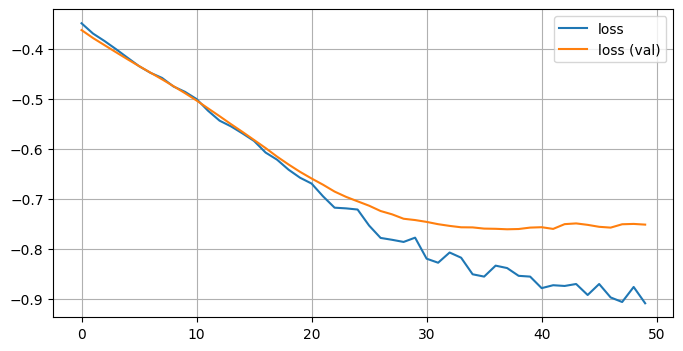

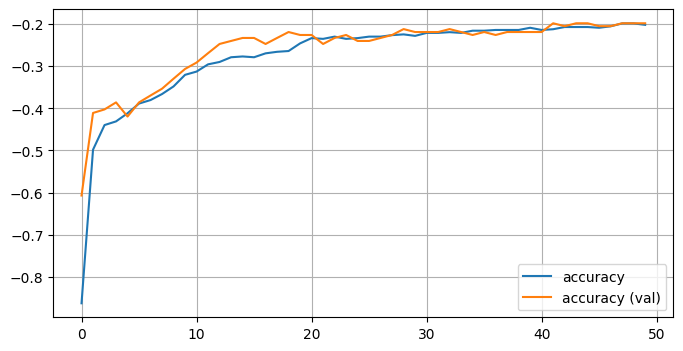

In [315]:
import numpy as np
plt.figure(figsize=(8,4))
plt.plot(np.log(histcl.history["loss"]),label="loss")
plt.plot(np.log(histcl.history["val_loss"]),label="loss (val)")
plt.grid()
plt.legend()

plt.figure(figsize=(8,4))
plt.plot(np.log(histcl.history["accuracy"]),label="accuracy")
plt.plot(np.log(histcl.history["val_accuracy"]),label="accuracy (val)")
plt.grid()
plt.legend()